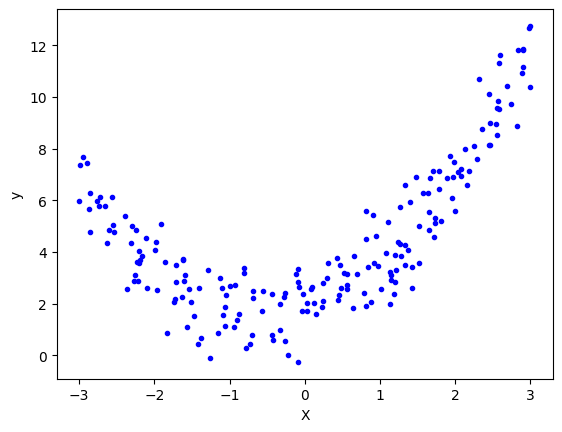

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

In [22]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
r2_score(ytest,ypred)

0.31814889220764386

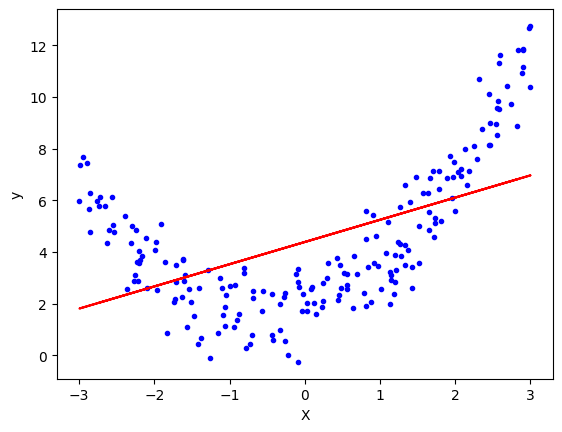

In [23]:
plt.plot(X, y,'b.')
plt.plot(X, lr.predict(X),'r')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [24]:
poly = PolynomialFeatures(degree=2) # gives x^0 + x^1 + x^2
xtrain_trans = poly.fit_transform(xtrain)
xtest_trans = poly.transform(xtest)

In [25]:
print(xtrain[0])
print(xtrain_trans[0])

[-2.76587958]
[ 1.         -2.76587958  7.65008984]


In [26]:
lr1 = LinearRegression()
lr1.fit(xtrain_trans,ytrain)
ypred = lr1.predict(xtest_trans)

r2_score(ytest,ypred)

0.8467424343418248

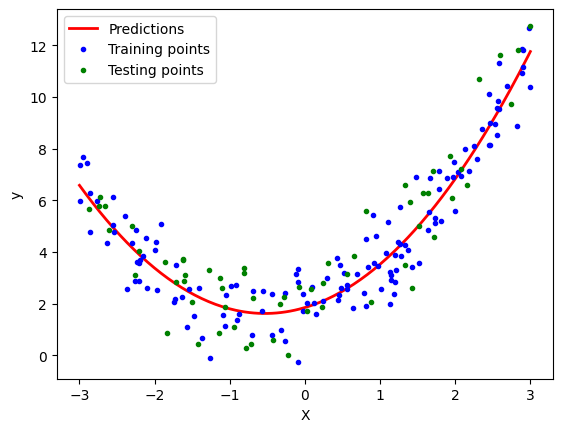

In [27]:
Xnew=np.linspace(-3, 3, 200).reshape(200, 1) # Return evenly spaced numbers over a specified interval.
Xnewpoly = poly.transform(Xnew)
ynew = lr1.predict(Xnewpoly)
plt.plot(Xnew, ynew, "r-", linewidth=2, label="Predictions")
plt.plot(xtrain, ytrain, "b.",label='Training points')
plt.plot(xtest, ytest, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## For High Degree

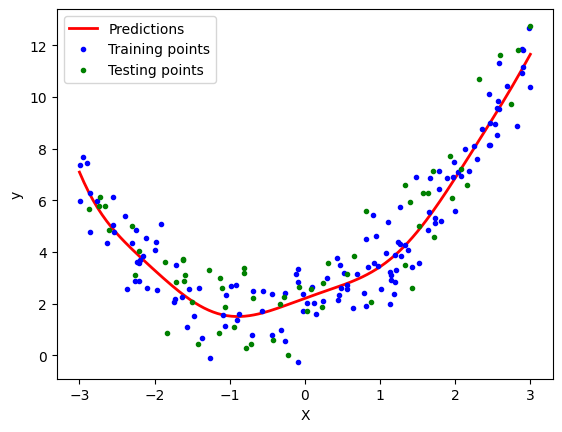

In [28]:
poly1 = PolynomialFeatures(degree=10)

x_trans = poly1.fit_transform(xtrain)
lrn = LinearRegression()
lrn.fit(x_trans,ytrain)


Xnew=np.linspace(-3, 3, 200).reshape(200, 1)
Xnewpoly = poly1.transform(Xnew)
ynew = lrn.predict(Xnewpoly)
plt.plot(Xnew, ynew, "r-", linewidth=2, label="Predictions")
plt.plot(xtrain, ytrain, "b.",label='Training points')
plt.plot(xtest, ytest, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# 3-d

In [29]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [30]:
lr_3d = LinearRegression()
lr_3d.fit(np.array([x,y]).reshape(100,2),z)

LinearRegression()

In [31]:
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

In [32]:
z_pred = lr_3d.predict(final).reshape(10,10)

In [33]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_pred ))

fig.show()

In [34]:
poly_3d = PolynomialFeatures(degree = 5)
x_multi_trans = poly_3d.fit_transform(np.array([x,y]).reshape(100,2))
x_test_multi = poly_3d.transform(final)

In [35]:
print("Input",poly_3d.n_features_in_)
print("Ouput",poly_3d.n_output_features_)
print("Powers\n",poly_3d.powers_)
#  for 2 : x^2,y^2,xy,x,y,1

Input 2
Ouput 21
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]]


In [36]:
lr_new = LinearRegression()
lr_new.fit(x_multi_trans,z)

LinearRegression()

In [37]:
z_pred_1 = lr_new.predict(x_test_multi).reshape(10,10)

In [38]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_pred_1))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()